In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

In [2]:
migration = pd.read_csv('migration_nz.csv')

In [3]:
# Print the first 5 rows.
migration.head(5)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


This dataset includes the following variables:

Measure — The signal type given in this row including “Arrivals”, “Departures”, “Net”.


Country — Country from where people arrived into New Zealand (for Measure = “Arrivals”) or to where they left (for Measure = “Departures”). Contains special values “Not Stated” and “All countries” (grand total).


Citizenship — Citizenship of the migrants including “New Zealand Citizen”, “Australian Citizen”, “Total All Citizenships”.


Year — Year of the measurement (arrival or departure).

Value — Number of migrants.

In [4]:
# Show information about the data columns.
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [4]:
migration.isna().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
dtype: int64

Value column has 72 fields with null or missing values. We will replace these null values with the median value.

In [5]:
migration["Value"].fillna(migration["Value"].median(),inplace=True)

Check for unique values in the Measure column.

In [6]:

migration['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

We need to translate some categorical data in preparation for running the machine learning model. First we will replace each of the unique string values in the Measure column with an integer value. Arrivals will have a value of 0, Departures will have a value of 1, and Net will have a value of 2.

In [8]:
migration['Measure'].replace("Arrivals",0,inplace=True)
migration['Measure'].replace("Departures",1,inplace=True)
migration['Measure'].replace("Net",2,inplace=True)

Check for unique values in the Country column.

In [9]:
migration['Country'].unique()


array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

There are 253 unique countries. We will replace each of the unique string values in the Country column with an integer value. We will use the Pandas factorize method to transform the data from text to numbers.

In [10]:
migration['Country'] = pd.factorize(migration.Country)[0]

Check for unique values in the Citizenship column.

In [11]:
migration['Citizenship'].unique()

array(['New Zealand Citizen', 'Australian Citizen',
       'Total All Citizenships'], dtype=object)

There are 3 unique citizenships. We will replace each of the unique string values in the Citizenship column with an integer value. New Zealand Citizen will have a value of 0, Australian Citizen will have a value of 1, and Total All Citizenships will have a value of 2.

In [12]:
migration['Citizenship'].replace('New Zealand Citizen',0,inplace=True)
migration['Citizenship'].replace('Australian Citizen',1,inplace=True)
migration['Citizenship'].replace('Total All Citizenships',2,inplace=True)

Visualizing the correlation between variables.

<AxesSubplot:>

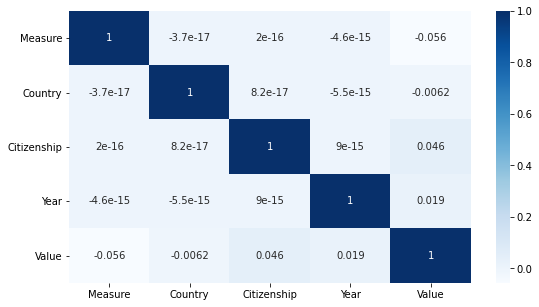

In [19]:
# We will use the Pearson Correlation method.
plt.figure(figsize=(9,5)) 
corr = migration.corr() 
sns.heatmap(corr, annot=True, cmap='Blues')

We will use Measure, Country, Citizenship and Year as the feature variables. We will use Value as the target variable.

Split the Data into Test and Training Data Sets

In [32]:
x_data = migration[['Country','Measure','Year','Citizenship']]
y_data = migration['Value']

In [33]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.30, random_state=9)

Implemenation of random forest

In [55]:
# Create model object. 
model_rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [56]:
model_rf.score(x_test_data, y_test_data)

0.7365759638084339

HyperParameter Tuning

In [59]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(model_rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 3,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,50, num = 25)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(5,25, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1,10, num = 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5,
               6,
               8,
               10,
               12,
               14,
               16,
               18,
               20,
               21,
               23,
               25,
               27,
               29,
               31,
               33,
               35,
               36,
               38,
               40,
               42,
               44,
               46,
               48,
               50,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 7, 10],
 'min_samples_split': [5, 10, 15, 20, 25],
 'n_estimators': [50,
                  60,
                  70,
                  81,
                  91,
                  102,
                  112,
                  122,
                  133,
                  143,
                  154,
                  164,
                  175,
                  185,
                  195,
                  20

Random Search Training

In [81]:
# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_training_data, y_training_data)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Thushar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(bootstrap='True',
                                                   max_features='auto',
                                                   n_estimators=143,
                                                   n_jobs=-1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 8, 10, 12, 14, 16,
                                                      18, 20, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 36, 38,
                                                      40, 42, 44, 46, 48, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [50, 60, 70, 81, 91,
                                                         102, 112, 122, 133,
                                                         143, 154, 164, 175,
                                                         185, 195, 206, 216,
                                                         227, 237, 247, 258,
                                                         268, 279, 289, 300]},
                   random_state=42, verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 206,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 14,
 'bootstrap': True}

Using the best parameters from the search

In [85]:
model_rf = RandomForestRegressor(n_estimators=206,min_samples_split=5,min_samples_leaf=1,max_features = "auto",max_depth=14,n_jobs=-1,bootstrap="True")
model_rf.fit(x_training_data, y_training_data)
predictions_rf = model_rf.predict(x_test_data)
model_rf.score(x_test_data, y_test_data)

C:\Users\Thushar\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.9266336963648988

Visualize the number of people who migrated between countries by year.

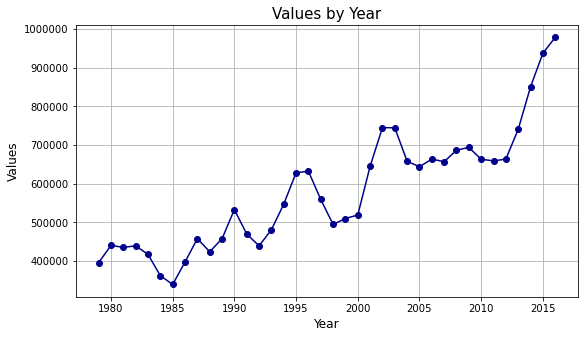

In [46]:
# Visualize number of migrations by year in a line graph.
grouped = migration.groupby(['Year']).aggregate({'Value' : 'sum'}).reset_index()
grouped = grouped.astype(int)
plt.figure(figsize=(9,5))
plt.plot(grouped['Year'], grouped['Value'], color='darkblue',  marker='o')
plt.ticklabel_format(style='plain')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Values by Year', fontsize=15)
plt.grid()
plt.show()

C:\Users\Thushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Values by Year')

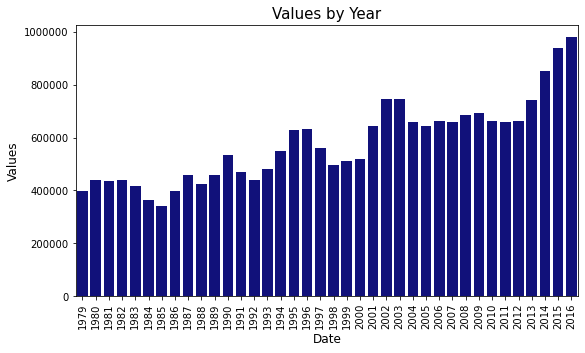

In [38]:
# Visualize number of migrations by year in a bar plot graph.
plt.figure(figsize=(9, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(grouped['Year'], grouped['Value'], color='darkblue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size = 10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Values by Year', fontsize=15)